In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [113]:
import os
import cv2
import numpy as np

def compute_l1_norm(directory_path):
    images = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
    
    # Resize images to a consistent shape
    min_shape = min(image.shape for image in images)
    images_resized = [cv2.resize(image, min_shape[::-1]) for image in images]
    
    # Calculate L1 norm
    l1_norm = 0
    for i in range(len(images_resized) - 1):
        l1_norm += np.sum(np.abs(images_resized[i].astype(np.float32) - images_resized[i + 1].astype(np.float32)))
    
    return l1_norm

directory_path = "clean_images"
# Compute L1 norm
result = compute_l1_norm(directory_path)
print("L1 norm of the images:", result)


KeyboardInterrupt: 

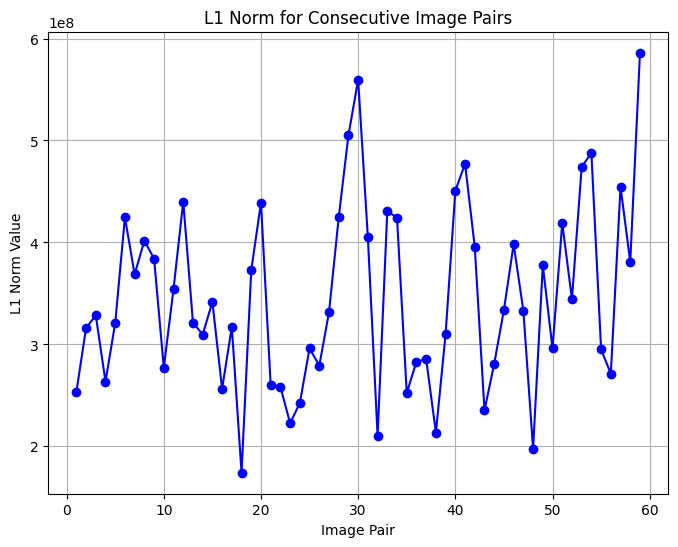

In [ ]:
def compute_l1_norm_per_image(directory_path):
    images = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
    
    # Resize images to a consistent shape
    min_shape = min(image.shape for image in images)
    images_resized = [cv2.resize(image, min_shape[::-1]) for image in images]
    
    # Calculate L1 norm for each pair of consecutive images
    l1_norm_values = []
    for i in range(len(images_resized) - 1):
        l1_norm = np.sum(np.abs(images_resized[i].astype(np.float32) - images_resized[i + 1].astype(np.float32)))
        l1_norm_values.append(l1_norm)
    
    return l1_norm_values



# Compute L1 norm for each image pair
l1_norm_values = compute_l1_norm_per_image(directory_path)

# Plotting L1 norm values
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(l1_norm_values) + 1), l1_norm_values, marker='o', linestyle='-', color='b')
plt.title('L1 Norm for Consecutive Image Pairs')
plt.xlabel('Image Pair')
plt.ylabel('L1 Norm Value')
plt.grid(True)
plt.show()

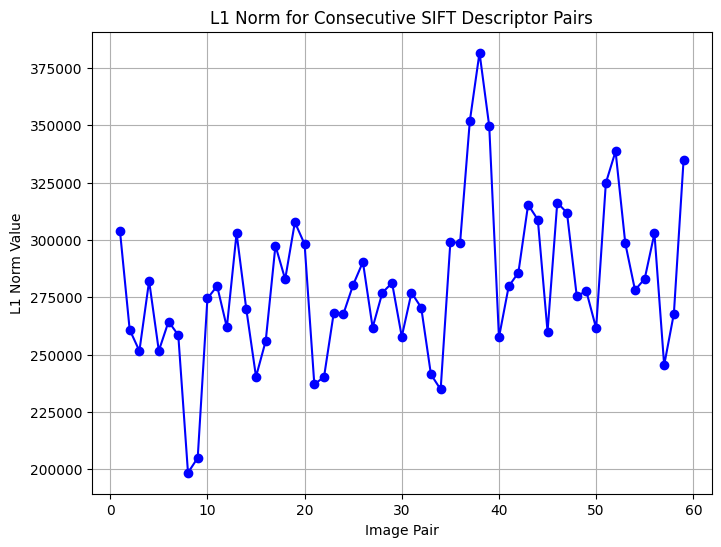

In [ ]:
def compute_sift_l1_norm(directory_path, num_descriptors=100):
    sift = cv2.SIFT_create()
    images = []
    sift_descriptors = []
    
    # Iterate through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
            img_path = os.path.join(directory_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read images as grayscale
            images.append(img)
            kp, des = sift.detectAndCompute(img, None)
            # Normalize the number of descriptors
            if des is not None:
                des = des[:num_descriptors]
                sift_descriptors.append(des)
    
    # Calculate L1 norm for each pair of consecutive SIFT descriptors
    l1_norm_values = []
    for i in range(len(sift_descriptors) - 1):
        l1_norm = np.sum(np.abs(sift_descriptors[i].astype(np.float32) - sift_descriptors[i + 1].astype(np.float32)))
        l1_norm_values.append(l1_norm)
    
    return l1_norm_values

# Directory containing the images

# Compute L1 norm for SIFT descriptors of each image pair
sift_l1_norm_values = compute_sift_l1_norm(directory_path)

# Plotting L1 norm values of SIFT descriptors
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sift_l1_norm_values) + 1), sift_l1_norm_values, marker='o', linestyle='-', color='b')
plt.title('L1 Norm for Consecutive SIFT Descriptor Pairs')
plt.xlabel('Image Pair')
plt.ylabel('L1 Norm Value')
plt.grid(True)
plt.show()


In [ ]:
pip install numpy scikit-learn opencv-python



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/69/8a/cf17d6443f5f537e099be81535a56ab68a473f9393fbffda38cd19899fc8/scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/f8/ec/b46756f80e3f4c5f0989f6e4492c2851f156d9c239d554754a3c8cffd4e2/scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------------- 60.4/60.4 kB 809.0 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://file

In [5]:
import cv2
import os

def calculate_l1_norm(image1, image2):
    return cv2.norm(image1, image2, cv2.NORM_L1)

def is_tb_image(image_path):
    tb_image_path = image_path
    tb_image = cv2.imread(tb_image_path)
    current_image = cv2.imread(image_path)
    l1_distance = calculate_l1_norm(tb_image, current_image)
    
    # Set a threshold for L1 distance to determine if it's a TB image or not
    threshold = 10000  # You may need to adjust this based on your dataset
    
    if l1_distance < threshold:
        return True  # TB image
    else:
        return False  # Not a TB image

directory_path = "clean_images"
for filename in os.listdir(directory_path):
    if filename.endswith(".png"):
        image_path = os.path.join(directory_path, filename)
        is_tb = is_tb_image(image_path)
        # print(f"{filename} is TB: {is_tb}")

# L1 Norm Values of Clean Images

In [13]:
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
# directory_path = "clean_images"
output_file = "output_results.txt"


''' 
gets average pixel value over whole image
in: image
out: average val 
idea - higher pixel value --> healthier according to histogram
'''
def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response
    


''' 
engine of classifier
in- directory path
out- list of l1 vals

'''

def increase_contrast(image, box_size=8, lim = 2):
    '''
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    '''
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def classify_images(directory_path, threshold=118):
    # tb_image_path = directory_path
    # print(directory_path)
    # tb_image = cv2.imread(tb_image_path)
    # tb_image = cv2.cvtColor(tb_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    l1_vals = []
    correct = 0
    incorrect = 0
    l1_val_tb = []
    l1_val_healthy = []
    for filename in os.listdir(directory_path):
        # print(filename)
        if filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            current_image = cv2.imread(image_path)
            current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
            new_image = increase_contrast(current_image)
            l1_distance = calculate_l1_norm(new_image)
            
            label = int(filename[-5])
            if label == 1:
                l1_val_tb.append(l1_distance)
            else:
                l1_val_healthy.append(l1_distance)
                
            if l1_distance < threshold:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct +=1
            else:
                incorrect +=1
                
    return l1_vals, correct, incorrect, l1_val_tb, l1_val_healthy

accuracies = {}
thresholds = [100, 105, 110, 115, 120]
directory_path = 'clean_images'
for thresh in thresholds:
    print(thresh)
    l1_vals,correct, incorrect, l1_val_tb, l1_val_healthy = classify_images(directory_path, threshold = thresh)
    accuracies[str(thresh)] = str(correct/(correct+incorrect))



100
105
110
115
120


387 275
Percent Accuracy: 0.5845921450151057


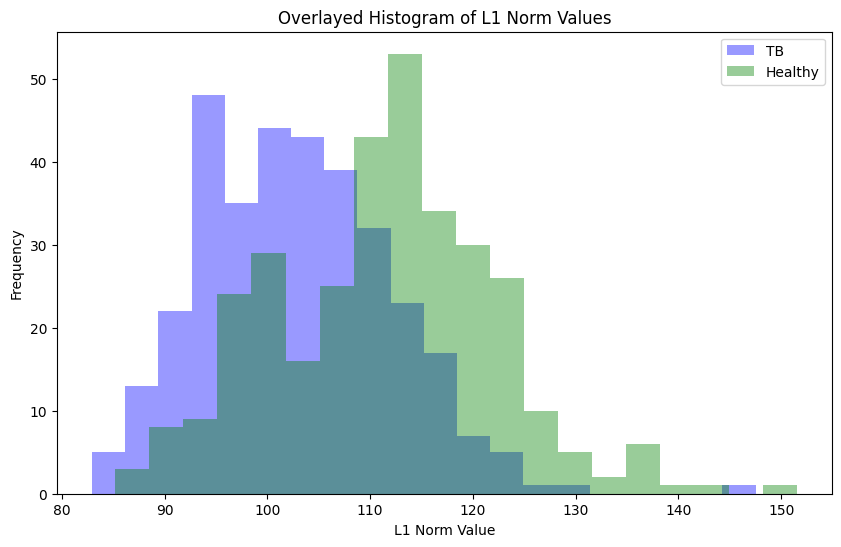

In [11]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_val_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_val_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

### Plot the accuracies obtained at different thresholds

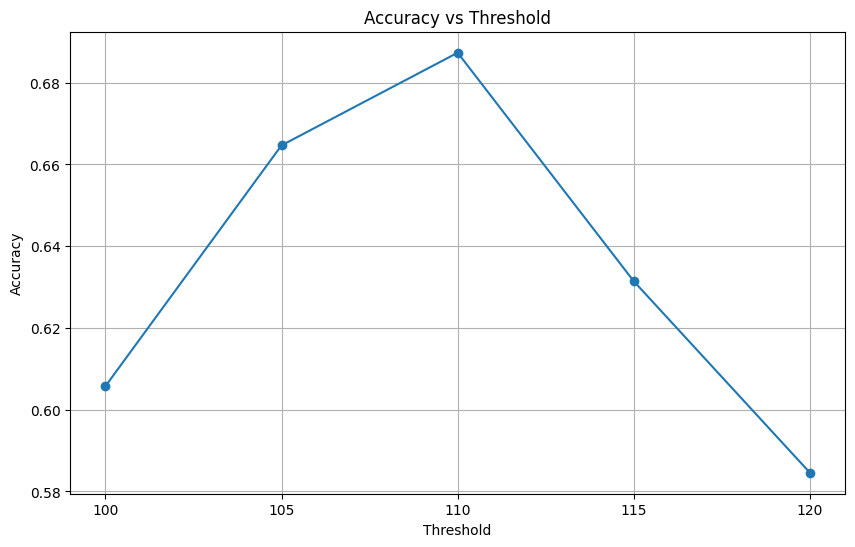

In [14]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, accuracies.keys()))
accuracy_values = list(map(float, accuracies.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# L1 Norm Values of Raw Images

In [22]:
#this is l1 norm for raw images
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
# directory_path = "clean_images"
output_file = "output_results.txt"


''' 
gets average pixel value over whole image
in: image
out: average val 
idea - higher pixel value --> healthier according to histogram
'''
def calculate_l1_norm(image):
    height, width = image.shape
    l1_norm_response = np.sum(np.abs(image))
    l1_norm_response /= (width * height)
    return l1_norm_response
    


''' 
engine of classifier
in- directory path
out- list of l1 vals

'''

def increase_contrast(image, box_size=8, lim = 2):
    '''
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    '''
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def classify_images(directory_path, threshold=118):
    # tb_image_path = directory_path
    # print(directory_path)
    # tb_image = cv2.imread(tb_image_path)
    # tb_image = cv2.cvtColor(tb_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    l1_vals = []
    correct = 0
    incorrect = 0
    l1_val_tb = []
    l1_val_healthy = []
    for filename in os.listdir(directory_path):
        # print(filename)
        if filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            current_image = cv2.imread(image_path)
            current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
            new_image = increase_contrast(current_image)
            l1_distance = calculate_l1_norm(new_image)
            
            label = int(filename[-5])
            if label == 1:
                l1_val_tb.append(l1_distance)
            else:
                l1_val_healthy.append(l1_distance)
                
            if l1_distance < threshold:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct +=1
            else:
                incorrect +=1
                
    return l1_vals, correct, incorrect, l1_val_tb, l1_val_healthy

accuracies = {}
thresholds = [130,135,140,145,150]
directory_path = 'C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png'
for thresh in thresholds:
    print(thresh)
    l1_vals,correct, incorrect, l1_val_tb, l1_val_healthy = classify_images(directory_path, threshold = thresh)
    accuracies[str(thresh)] = str(correct/(correct+incorrect))



130
135
140
145
150


415 247
Percent Accuracy: 0.6268882175226587


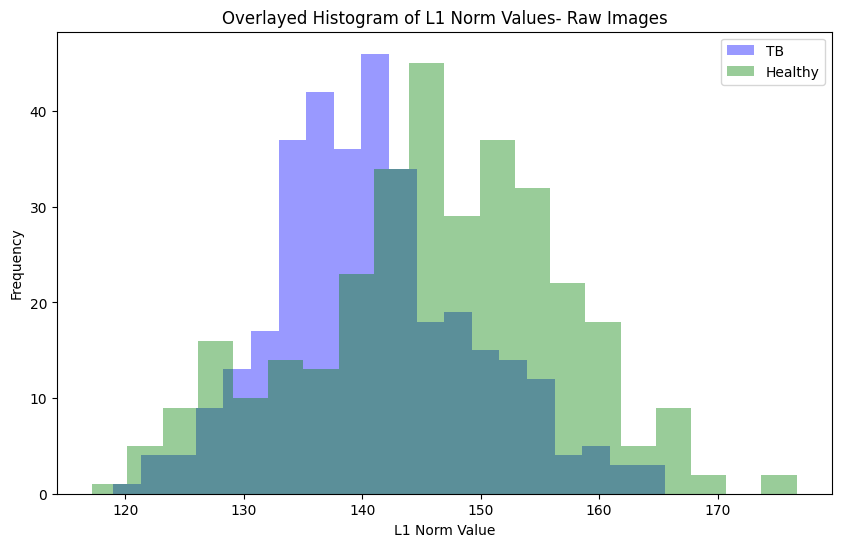

In [23]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_val_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_val_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of L1 Norm Values- Raw Images')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

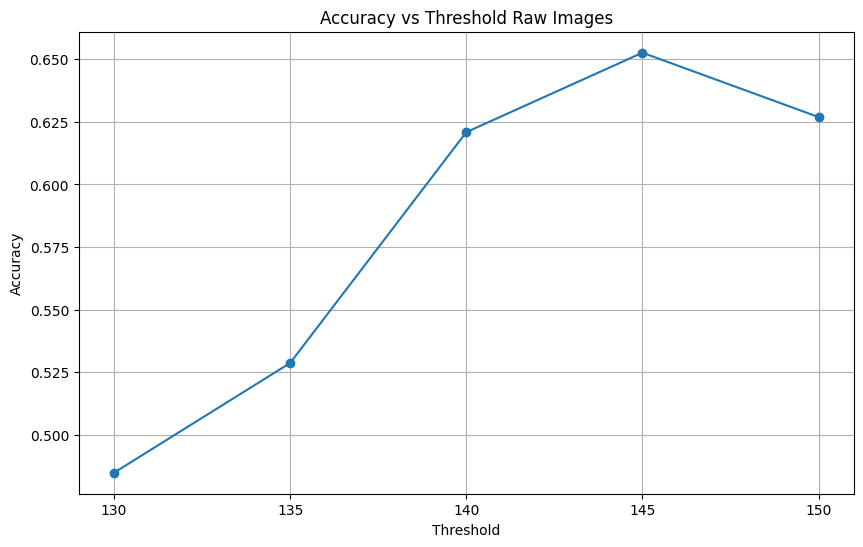

In [24]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, accuracies.keys()))
accuracy_values = list(map(float, accuracies.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Raw Images')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# Sift L1 Norm Values Clean Images

In [39]:
import cv2
import os
import numpy as np


def increase_contrast(image, box_size=8, lim=2):
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def compute_sift_l1_norm(image, num_descriptors=100):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(image, None)
    
    # Normalize the number of descriptors
    if des is not None:
        des = des[:num_descriptors]

    return np.mean(np.mean(des, axis=0)) if des is not None else None



def classify_images(directory_path, threshold=118):
    l1_val_tb = []
    l1_val_healthy = []
    correct = 0
    incorrect = 0

    sift = cv2.SIFT_create()

    for filename in os.listdir(directory_path):
        if filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            current_image = cv2.imread(image_path)
            current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
            new_image = increase_contrast(current_image_gray)
            
            label = int(filename[-5])
            sift_l1_norm = compute_sift_l1_norm(new_image)  # Calculate SIFT L1 norm
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
                
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < threshold:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct += 1
            else:
                incorrect += 1

    return l1_val_tb, l1_val_healthy, correct, incorrect

# Usage example

accuracies = {}
thresholds = [22,23,24]
directory_path = 'clean_images'
for thresh in thresholds:
    print(thresh)
    l1_val_tb, l1_val_healthy, correct, incorrect = classify_images(directory_path, threshold = thresh)
    accuracies[str(thresh)] = str(correct/(correct+incorrect))


19


KeyboardInterrupt: 

In [54]:

# Load the image
image_path = os.path.join("clean_images", "CHNCXR_0652_1.png")
current_image = cv2.imread(image_path)
current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)

# Downsample the image to a smaller size
resized_image = cv2.resize(current_image_gray, (0, 0), fx=0.5, fy=0.5)  # Adjust the scaling factor as needed

# Set SIFT parameters
sift = cv2.SIFT_create(nfeatures=50)  # Adjust nfeatures to limit the number of keypoints


# Compute SIFT descriptors on the downsampled image
kp, des = sift.detectAndCompute(resized_image, None)


if des is not None:
    # Compute mean of SIFT descriptors
    mean_descriptor = np.mean(des, axis=0)
    print(np.mean(mean_descriptor))
else:
    print("No keypoints found.")



22.446095


In [57]:
import cv2
import concurrent.futures
import numpy as np
import time

def compute_sift(image, n_features):
    try:
        sift = cv2.SIFT_create(nfeatures=n_features)
        kp, des = sift.detectAndCompute(image, None)
        return des if des is not None else []
    except Exception as e:
        print(f"Exception during SIFT computation: {e}")
        return []

# Load the image
image_path = os.path.join("clean_images", "CHNCXR_0652_1.png")
current_image = cv2.imread(image_path)
current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)

# Downsample the image to a smaller size
resized_image = cv2.resize(current_image_gray, (0, 0), fx=0.5, fy=0.5)  # Adjust the scaling factor as needed

# Set parameters
num_features = 50  # Adjust the number of features

# Measure execution time
start_time = time.time()

block_height, block_width = resized_image.shape[:2]
block_descriptors = []

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = []
    for i in range(0, block_height, block_height // 4):
        for j in range(0, block_width, block_width // 4):
            block = resized_image[i:i + block_height // 4, j:j + block_width // 4]
            futures.append(executor.submit(compute_sift, block, num_features))

    for future in concurrent.futures.as_completed(futures):
        result = future.result()
        if result is not None and len(result) > 0:
            block_descriptors.extend(result)

mean_descriptor = np.mean(block_descriptors, axis=0) if block_descriptors else None

execution_time = time.time() - start_time

if mean_descriptor is not None:
    print(np.mean(mean_descriptor))
else:
    print("No descriptors found or an error occurred during computation.")
print(f"Execution time: {execution_time} seconds")


23.889767
Execution time: 0.2758767604827881 seconds


In [101]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def compute_sift(image, n_features):
    try:
        sift = cv2.SIFT_create(nfeatures=n_features)
        kp, des = sift.detectAndCompute(image, None)
        return des if des is not None else []
    except Exception as e:
        print(f"Exception during SIFT computation: {e}")
        return []
    
def increase_contrast(image, box_size=8, lim = 2):
    '''
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    '''
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(current_image_gray, (0, 0), fx=0.5, fy=0.5)
    new_image = increase_contrast(resized_image)

    block_height, block_width = new_image.shape[:2]
    block_descriptors = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for i in range(0, block_height, block_height // 4):
            for j in range(0, block_width, block_width // 4):
                block = new_image[i:i + block_height // 4, j:j + block_width // 4]
                futures.append(executor.submit(compute_sift, block, n_features))

        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result is not None and len(result) > 0:
                block_descriptors.extend(result)

    mean_descriptor = np.mean(block_descriptors, axis=0) if block_descriptors else None
    return np.mean(mean_descriptor) if mean_descriptor is not None else None

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        mean_desc = process_image(image_path)
        # print(f"Image: {filename}, Mean Descriptor: {mean_desc}")

execution_time = time.time() - start_time
print(f"Total execution time for all images: {execution_time} seconds")


KeyboardInterrupt: 

In [102]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def compute_sift(image, n_features):
    try:
        sift = cv2.SIFT_create(nfeatures=n_features)
        kp, des = sift.detectAndCompute(image, None)
        return des if des is not None else []
    except Exception as e:
        print(f"Exception during SIFT computation: {e}")
        return []
    
def increase_contrast(image, box_size=8, lim = 2):
    '''
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    '''
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(current_image_gray, (0, 0), fx=0.5, fy=0.5)
    resized_image = increase_contrast(resized_image)

    block_height, block_width = resized_image.shape[:2]
    block_descriptors = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for i in range(0, block_height, block_height // 4):
            for j in range(0, block_width, block_width // 4):
                block = resized_image[i:i + block_height // 4, j:j + block_width // 4]
                futures.append(executor.submit(compute_sift, block, n_features))

        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result is not None and len(result) > 0:
                block_descriptors.extend(result)

    mean_descriptor = np.mean(block_descriptors, axis=0) if block_descriptors else None
    mean_descriptor_val = np.mean(mean_descriptor) if mean_descriptor is not None else None
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "sift_value": np.mean(mean_descriptor_val),
        "mean_descriptor": mean_descriptor
    }

# Directory containing images
images_directory = "clean_images"

# Measure execution time
start_time = time.time()

image_data_list = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list.append(image_data)

execution_time = time.time() - start_time
print(f"Total execution time for all images: {execution_time} seconds")

# Example usage of stored data
print(image_data_list)  # Accessing the data of the first image


Total execution time for all images: 227.0682761669159 seconds
[{'image_name': 'CHNCXR_0001_0.png', 'label': 0, 'sift_value': 24.573675, 'mean_descriptor': array([ 31.170404 ,  22.02242  ,  14.94843  ,  13.654709 ,  13.116591 ,
         9.417041 ,   9.253364 ,  13.163677 ,  86.0426   ,  39.881165 ,
        15.470852 ,  10.540359 ,  10.098655 ,   8.834081 ,  10.549327 ,
        28.997757 ,  68.25785  ,  28.567265 ,  11.786996 ,  15.742152 ,
        25.284754 ,  16.63453  ,  12.5919285,  26.73991  ,  24.311659 ,
        15.403587 ,  11.643497 ,  15.3026905,  24.652466 ,  18.246637 ,
        11.94843  ,  14.786996 ,  45.192825 ,  21.636772 ,  16.15695  ,
        18.17713  ,  18.890135 ,  13.995516 ,  10.869955 ,  18.605381 ,
       112.652466 ,  39.58296  ,  17.159193 ,  18.596413 ,  17.401346 ,
        14.116591 ,  13.125561 ,  37.997757 ,  94.367714 ,  35.627804 ,
        13.905829 ,  23.670404 ,  39.152466 ,  26.598654 ,  16.20852  ,
        29.073992 ,  33.533634 ,  18.840807 ,  15.66

In [106]:
def classify_images_with_precomputed_sift(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['sift_value']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results = classify_images_with_precomputed_sift(image_data_list, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results)


[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Correct Counts: [326, 326, 326, 323, 309, 307, 347, 331, 336, 336, 336]
Incorrect Counts: [336, 336, 336, 339, 353, 355, 315, 331, 326, 326, 326]
Accuracies: {'18': 0.49244712990936557, '19': 0.49244712990936557, '20': 0.49244712990936557, '21': 0.4879154078549849, '22': 0.46676737160120846, '23': 0.4637462235649547, '24': 0.5241691842900302, '25': 0.5, '26': 0.5075528700906344, '27': 0.5075528700906344, '28': 0.5075528700906344}


415 247
Percent Accuracy: 0.6268882175226587


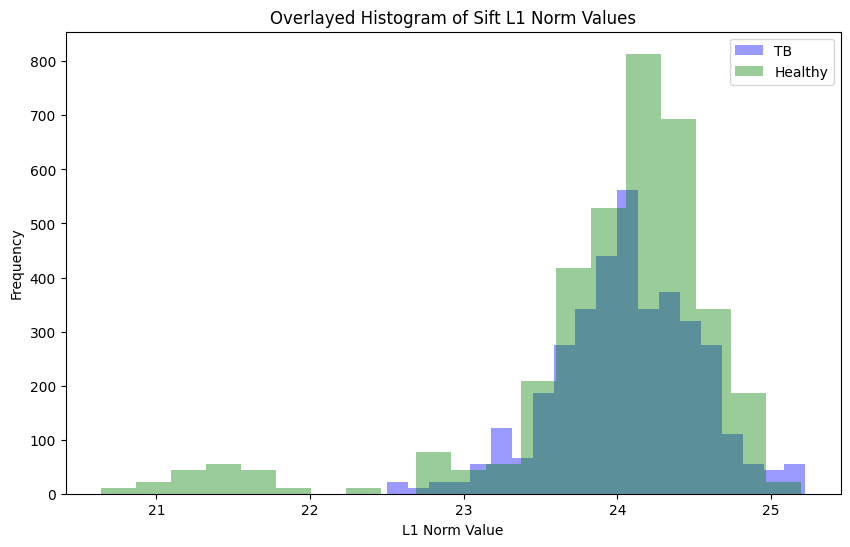

In [107]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of Sift L1 Norm Values')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

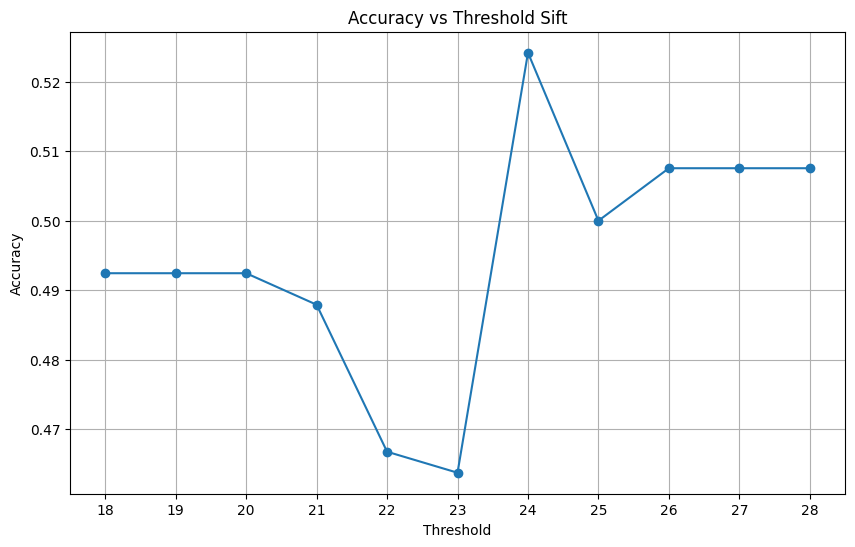

In [108]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results.keys()))
accuracy_values = list(map(float, results.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Sift')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()

# Raw Images Sift

In [109]:
import cv2
import os
import concurrent.futures
import numpy as np
import time

def compute_sift(image, n_features):
    try:
        sift = cv2.SIFT_create(nfeatures=n_features)
        kp, des = sift.detectAndCompute(image, None)
        return des if des is not None else []
    except Exception as e:
        print(f"Exception during SIFT computation: {e}")
        return []

def process_image(image_path, n_features=50):
    current_image = cv2.imread(image_path)
    current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(current_image_gray, (0, 0), fx=0.5, fy=0.5)
    resized_image = increase_contrast(resized_image)
    block_height, block_width = resized_image.shape[:2]
    block_descriptors = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for i in range(0, block_height, block_height // 4):
            for j in range(0, block_width, block_width // 4):
                block = resized_image[i:i + block_height // 4, j:j + block_width // 4]
                futures.append(executor.submit(compute_sift, block, n_features))

        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result is not None and len(result) > 0:
                block_descriptors.extend(result)

    mean_descriptor = np.mean(block_descriptors, axis=0) if block_descriptors else None
    mean_descriptor_val = np.mean(mean_descriptor) if mean_descriptor is not None else None
    return {
        "image_name": os.path.basename(image_path),
        "label": int(os.path.basename(image_path)[-5]),
        "sift_value": np.mean(mean_descriptor_val),
        "mean_descriptor": mean_descriptor
    }

# Directory containing images
images_directory = "C:/Caleb/College/UIC/Senior Year/CS 415/Images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"

# Measure execution time
start_time = time.time()

image_data_list = []

for filename in os.listdir(images_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_directory, filename)
        image_data = process_image(image_path)
        image_data_list.append(image_data)

execution_time = time.time() - start_time
print(f"Total execution time for all images: {execution_time} seconds")

# Example usage of stored data
print(len(image_data_list))  # Accessing the data of the first image


Total execution time for all images: 173.98163509368896 seconds
662


In [110]:
def classify_images_with_precomputed_sift(image_data_list, thresholds):
    accuracies = {}
    l1_val_tb = []
    l1_val_healthy = []
    correct = []
    incorrect = []
    
    for thresh in thresholds:
        correct_count = 0
        incorrect_count = 0
        for image_data in image_data_list:
            sift_l1_norm = image_data['sift_value']
            label = image_data['label']
            
            # Your thresholding logic and accuracy calculation here
            if sift_l1_norm is not None and sift_l1_norm < thresh:
                predicted_label = 1
            else:
                predicted_label = 0
                
            if predicted_label == label:
                correct_count += 1
            else:
                incorrect_count += 1
                
            # Store sift values for respective categories
            if label == 1:
                l1_val_tb.append(sift_l1_norm)
            else:
                l1_val_healthy.append(sift_l1_norm)
        
        correct.append(correct_count)
        incorrect.append(incorrect_count)
        
        accuracies[str(thresh)] = correct_count / (correct_count + incorrect_count) if correct_count + incorrect_count > 0 else 0.0
    
    return l1_val_tb, l1_val_healthy, correct, incorrect, accuracies

# Usage example
thresholds = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

# Assuming image_data_list contains the list of dictionaries with precomputed SIFT values

# Call the function with the precomputed SIFT values
l1_tb, l1_healthy, correct_counts, incorrect_counts, results = classify_images_with_precomputed_sift(image_data_list, thresholds)
print(thresholds)
print("Correct Counts:", correct_counts)
print("Incorrect Counts:", incorrect_counts)
print("Accuracies:", results)


[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
Correct Counts: [326, 326, 326, 326, 326, 326, 326, 326, 301, 306, 336, 336, 336]
Incorrect Counts: [336, 336, 336, 336, 336, 336, 336, 336, 361, 356, 326, 326, 326]
Accuracies: {'16': 0.49244712990936557, '17': 0.49244712990936557, '18': 0.49244712990936557, '19': 0.49244712990936557, '20': 0.49244712990936557, '21': 0.49244712990936557, '22': 0.49244712990936557, '23': 0.49244712990936557, '24': 0.45468277945619334, '25': 0.4622356495468278, '26': 0.5075528700906344, '27': 0.5075528700906344, '28': 0.5075528700906344}


415 247
Percent Accuracy: 0.6268882175226587


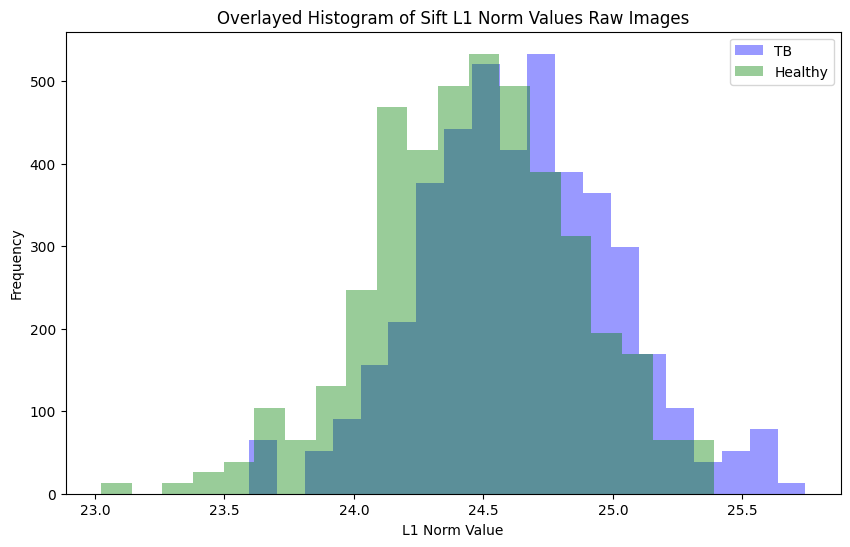

In [111]:
print(correct, incorrect)

print(f'Percent Accuracy: {correct/(correct+incorrect)}')


# Plotting the histograms
plt.figure(figsize=(10, 6))

# Overlaying the histograms
plt.hist(l1_tb, bins=20, alpha=0.4, color='blue', label='TB')
plt.hist(l1_healthy, bins=20, alpha=0.4, color='green', label='Healthy')

plt.title('Overlayed Histogram of Sift L1 Norm Values Raw Images')
plt.xlabel('L1 Norm Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

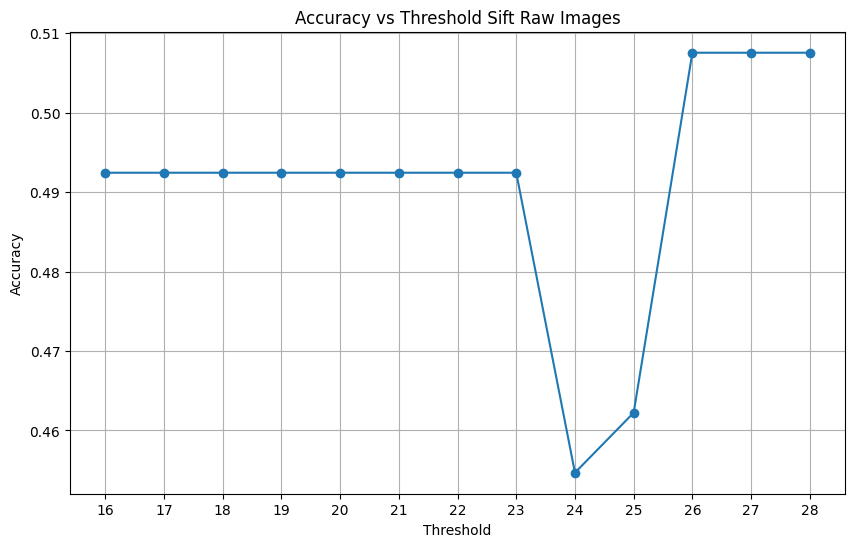

In [112]:

# Convert string keys and values to integers and floats
threshold_values = list(map(int, results.keys()))
accuracy_values = list(map(float, results.values()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, accuracy_values, marker='o')  # Use 'plt.bar' for a bar plot
plt.title('Accuracy vs Threshold Sift Raw Images')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks(threshold_values)  # Ensures all threshold values are shown as x-axis ticks
plt.grid(True)
plt.show()